<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ingest" data-toc-modified-id="Ingest-1">Ingest</a></span></li><li><span><a href="#Inspect-and-Clean" data-toc-modified-id="Inspect-and-Clean-2">Inspect and Clean</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Looking-for-duplicates" data-toc-modified-id="Looking-for-duplicates-2.0.1">Looking for duplicates</a></span></li><li><span><a href="#Change-datatypes" data-toc-modified-id="Change-datatypes-2.0.2">Change datatypes</a></span></li><li><span><a href="#Change-column-names" data-toc-modified-id="Change-column-names-2.0.3">Change column names</a></span></li><li><span><a href="#Manage-missing-data" data-toc-modified-id="Manage-missing-data-2.0.4">Manage missing data</a></span></li><li><span><a href="#Imputing-missing-values" data-toc-modified-id="Imputing-missing-values-2.0.5">Imputing missing values</a></span></li></ul></li><li><span><a href="#Check-categorical-data" data-toc-modified-id="Check-categorical-data-2.1">Check categorical data</a></span><ul class="toc-item"><li><span><a href="#Using-visuals-to-get-a-sense-of-the-data" data-toc-modified-id="Using-visuals-to-get-a-sense-of-the-data-2.1.1">Using visuals to get a sense of the data</a></span><ul class="toc-item"><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-2.1.1.1">Categorical data</a></span></li></ul></li><li><span><a href="#Examine-categorical-data-a-little-more-closely" data-toc-modified-id="Examine-categorical-data-a-little-more-closely-2.1.2">Examine categorical data a little more closely</a></span></li><li><span><a href="#Dropping-columns-and-rows" data-toc-modified-id="Dropping-columns-and-rows-2.1.3">Dropping columns and rows</a></span><ul class="toc-item"><li><span><a href="#Quantitative-data" data-toc-modified-id="Quantitative-data-2.1.3.1">Quantitative data</a></span></li></ul></li><li><span><a href="#Removing-outliers" data-toc-modified-id="Removing-outliers-2.1.4">Removing outliers</a></span></li></ul></li></ul></li><li><span><a href="#Exercise---30-minutes" data-toc-modified-id="Exercise---30-minutes-3">Exercise - 30 minutes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#See-Beer-Notebook---Part-1" data-toc-modified-id="See-Beer-Notebook---Part-1-3.0.1">See Beer Notebook - Part 1</a></span></li></ul></li></ul></li></ul></div>

# Ingest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn

In [ ]:
df = pd.read_csv('/Users/jamescody/GitHubCode/python_data/W2Wexport.csv')
df.head()

In [ ]:
# A cursory look at the data
df.shape

# Inspect and Clean

### Looking for duplicates

In [ ]:
# checking for duplicates
df.loc[df.duplicated()]# This will drop all duplicate rows

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True) 

# keep - which duplicate to keep, default is none!

df.loc[df.duplicated()]

### Change datatypes

In [ ]:
# Are we ok with the data types?
df.info()

In [ ]:
# Change data type

##### This is going to fail !!

#df['year'] = df['year'].astype(str) ############## case sensitive
#df['xyz'] = df['xyz'].astype(str)
df.info()

# vaccines['series_complete_pop_pct'] = pd.to_numeric(vaccines['series_complete_pop_pct']).astype(int)


In [54]:
def change_df_column_names(names):
    title=[]
    for name in names: 
        title.append(name.lower())
    return title

In [55]:
df.columns = change_df_column_names(df.columns)
df.head()

,year,month,employee_id,customer_id,cust_country,customer_name,product_id,product_name,shipping_company,unit_price,units_in_stock,units_on_order,discount,quantity,line_amont
0,2028,Jul,5,VINET,France,Paul Henriot,11,Queso Cabrales,Grandma Kelly Shipping,14.0,22.0,30,NaN,12,168.0
1,2028,Jul,5,VINET,France,Paul Henriot,42,Singaporean Hokkien Fried Mee,Grandma Kelly Shipping,9.8,26.0,0,NaN,10,98.0
2,2028,Jul,5,VINET,France,Paul Henriot,72,Mozzarella di Giovanni,Grandma Kelly Shipping,34.8,14.0,0,NaN,5,174.0
3,2028,Jul,6,TOMSP,Germany,Karin Josephs,14,Tofu,Best Shipper,18.6,35.0,0,NaN,9,167.4
4,2028,Jul,6,TOMSP,Germany,Karin Josephs,51,Manjimup Dried Apples,Best Shipper,42.4,20.0,0,NaN,40,1696.0


In [56]:
def split_columns(data):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    integer_columns = df.select_dtypes(include=['int']).columns.tolist()
    float_columns = df.select_dtypes(include=['float']).columns.tolist()
    boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    return numeric_columns, integer_columns, float_columns, boolean_columns, object_columns

In [57]:
ncols,icols,fcols,bcols,ocols = split_columns(df)

In [58]:
print(ncols)
print(icols)
print(fcols)
print(bcols)
print(ocols)

['year', 'employee_id', 'product_id', 'unit_price', 'units_in_stock', 'units_on_order', 'discount', 'quantity', 'line_amont']
['year', 'employee_id', 'product_id', 'units_on_order', 'quantity']
['unit_price', 'units_in_stock', 'discount', 'line_amont']
[]
['month', 'customer_id', 'cust_country', 'customer_name', 'product_name', 'shipping_company']


In [59]:
# Change data type of 2 more columns



df['year'] = df['year'].astype(str)
#df['xyz'] = df['xyz'].astype(str)
#df['xyz'] = df['xyz'].astype(str)
df.info()

# vaccines['series_complete_pop_pct'] = pd.to_numeric(vaccines['series_complete_pop_pct']).astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 665
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              666 non-null    object 
 1   month             666 non-null    object 
 2   employee_id       666 non-null    int64  
 3   customer_id       651 non-null    object 
 4   cust_country      666 non-null    object 
 5   customer_name     666 non-null    object 
 6   product_id        666 non-null    int64  
 7   product_name      666 non-null    object 
 8   shipping_company  666 non-null    object 
 9   unit_price        662 non-null    float64
 10  units_in_stock    664 non-null    float64
 11  units_on_order    666 non-null    int64  
 12  discount          488 non-null    float64
 13  quantity          666 non-null    int64  
 14  line_amont        666 non-null    float64
dtypes: float64(4), int64(4), object(7)
memory usage: 83.2+ KB


### Change column names

In [60]:
# Rename a few columns

short_names = {'shipping_company':'s_company'
               #, # creating a dict of the names to be changed
               #'xyz':'xyz',
               #'xyz':'xyz'
              }

df.rename(columns=short_names, inplace=True) # passing the dict to the rename method
                                             # inplace=True
df.info()

######## Appendix A has an explanation of 'inplace'

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 665
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            666 non-null    object 
 1   month           666 non-null    object 
 2   employee_id     666 non-null    int64  
 3   customer_id     651 non-null    object 
 4   cust_country    666 non-null    object 
 5   customer_name   666 non-null    object 
 6   product_id      666 non-null    int64  
 7   product_name    666 non-null    object 
 8   s_company       666 non-null    object 
 9   unit_price      662 non-null    float64
 10  units_in_stock  664 non-null    float64
 11  units_on_order  666 non-null    int64  
 12  discount        488 non-null    float64
 13  quantity        666 non-null    int64  
 14  line_amont      666 non-null    float64
dtypes: float64(4), int64(4), object(7)
memory usage: 83.2+ KB


### Manage missing data

In [61]:
# Just listing the columns and how many rows 
# for each have a missing value.

df.isnull().sum()

year                0
month               0
employee_id         0
customer_id        15
cust_country        0
customer_name       0
product_id          0
product_name        0
s_company           0
unit_price          4
units_in_stock      2
units_on_order      0
discount          178
quantity            0
line_amont          0
dtype: int64

In [62]:
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

discount          26.73
customer_id        2.25
unit_price         0.60
units_in_stock     0.30
year               0.00
dtype: float64

<Axes: >

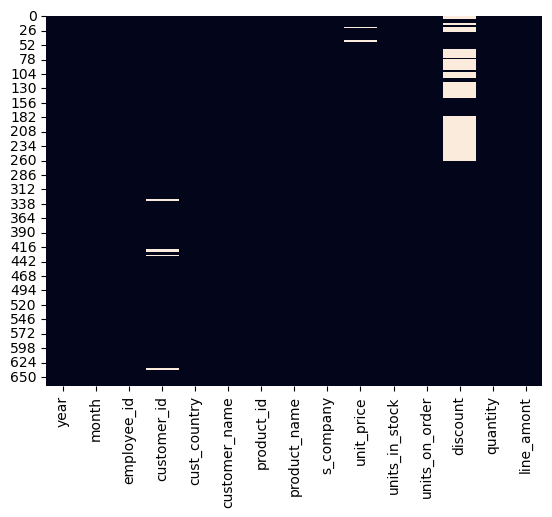

In [63]:
# Plotting missing values

sns.heatmap(df.isnull(), cbar=False)

### Imputing missing values

### Talk about customer_id.
- do we want to impute a missing value?  Does that make sense?
- If not, do we need to get rid of the column?
- How important is it to our analysis?
### Let's put customer_id aside for a minute.  Focus on measures that can be imputed.

In [64]:
#a = df['customer_id'].describe()
#b = df['customer_id'].median()
#c = df['customer_id'].mode()


In [65]:
a = df['unit_price'].describe()
b = df['unit_price'].median()
c = df['unit_price'].mode()
print(a)
print()
print(b)
print()
print(c)

count    662.000000
mean      22.651662
std       25.893182
min        2.000000
25%       10.050000
50%       15.600000
75%       27.200000
max      210.800000
Name: unit_price, dtype: float64

15.6

0    14.4
Name: unit_price, dtype: float64


In [68]:
# Fill missing values of unit_price with the average of unit_price (mean)
#df.units_in_stock.fillna( df.units_in_stock.mean() )
df.unit_price.fillna( df.unit_price.mean())

df_null = df.isna().mean().round(4) * 100
df_null.sort_values(ascending=False).head()

# Can be filled with an arbitrary number
# df.unit_price.fillna( 101 )


discount          26.73
customer_id        2.25
units_in_stock     0.30
year               0.00
month              0.00
dtype: float64

## Check categorical data - Let's talk about that customer_id

In [ ]:
sns.countplot(x='customer_id', data=df)

In [ ]:
df['customer_id'].nunique()

### What should we fix in customer_id?

In [ ]:
df['customer_id'].unique()

In [ ]:
df['customer_id'].value_counts()

In [ ]:

df['customer_id'] = df['customer_id'].replace('?', pd.NA)
df.isnull().sum()

# Customer_id had 15 null values before this.

In [ ]:
df['customer_id'] = df['customer_id'].fillna('unknown')
df.isnull().sum()


In [ ]:
# Example
# df.loc[df.gender == 'M','gender']='Male'
# df.head()

In [ ]:
# Change/Fix some of the data values
# Example
# df['gender'] = df['gender'].replace({'M':'Male', 'Mle':'Male', 'F':'Female'})
# df.head()

In [ ]:
# Inconsistent capitalization
# Apply a function along an axis of the DataFrame.

# Example
# df['gender'] = df['gender'].apply(lambda x:x.lower())
# df.head()

In [ ]:
#sns.countplot(x='gender', data=df)

In [ ]:
# x = df.loc[df.gender == 'unknown/invalid','gender']
# y = df.loc[df.gender == '?','gender']
# print(x)
# print(y)

In [ ]:
# df.iloc[11]

In [ ]:
# df['gender'] = df['gender'].replace({'?':'NaN', 'unknown/invalid':'male'})
# df.head()

In [ ]:
# Change a value for an entire column
#df.loc[:,'discharge_dispo'] = 99   
#df.loc[64410] = 99   # Change a value for an entire row
#df.head()


### Using visuals to get a sense of the data

In [ ]:
df.info()

#### Categorical data

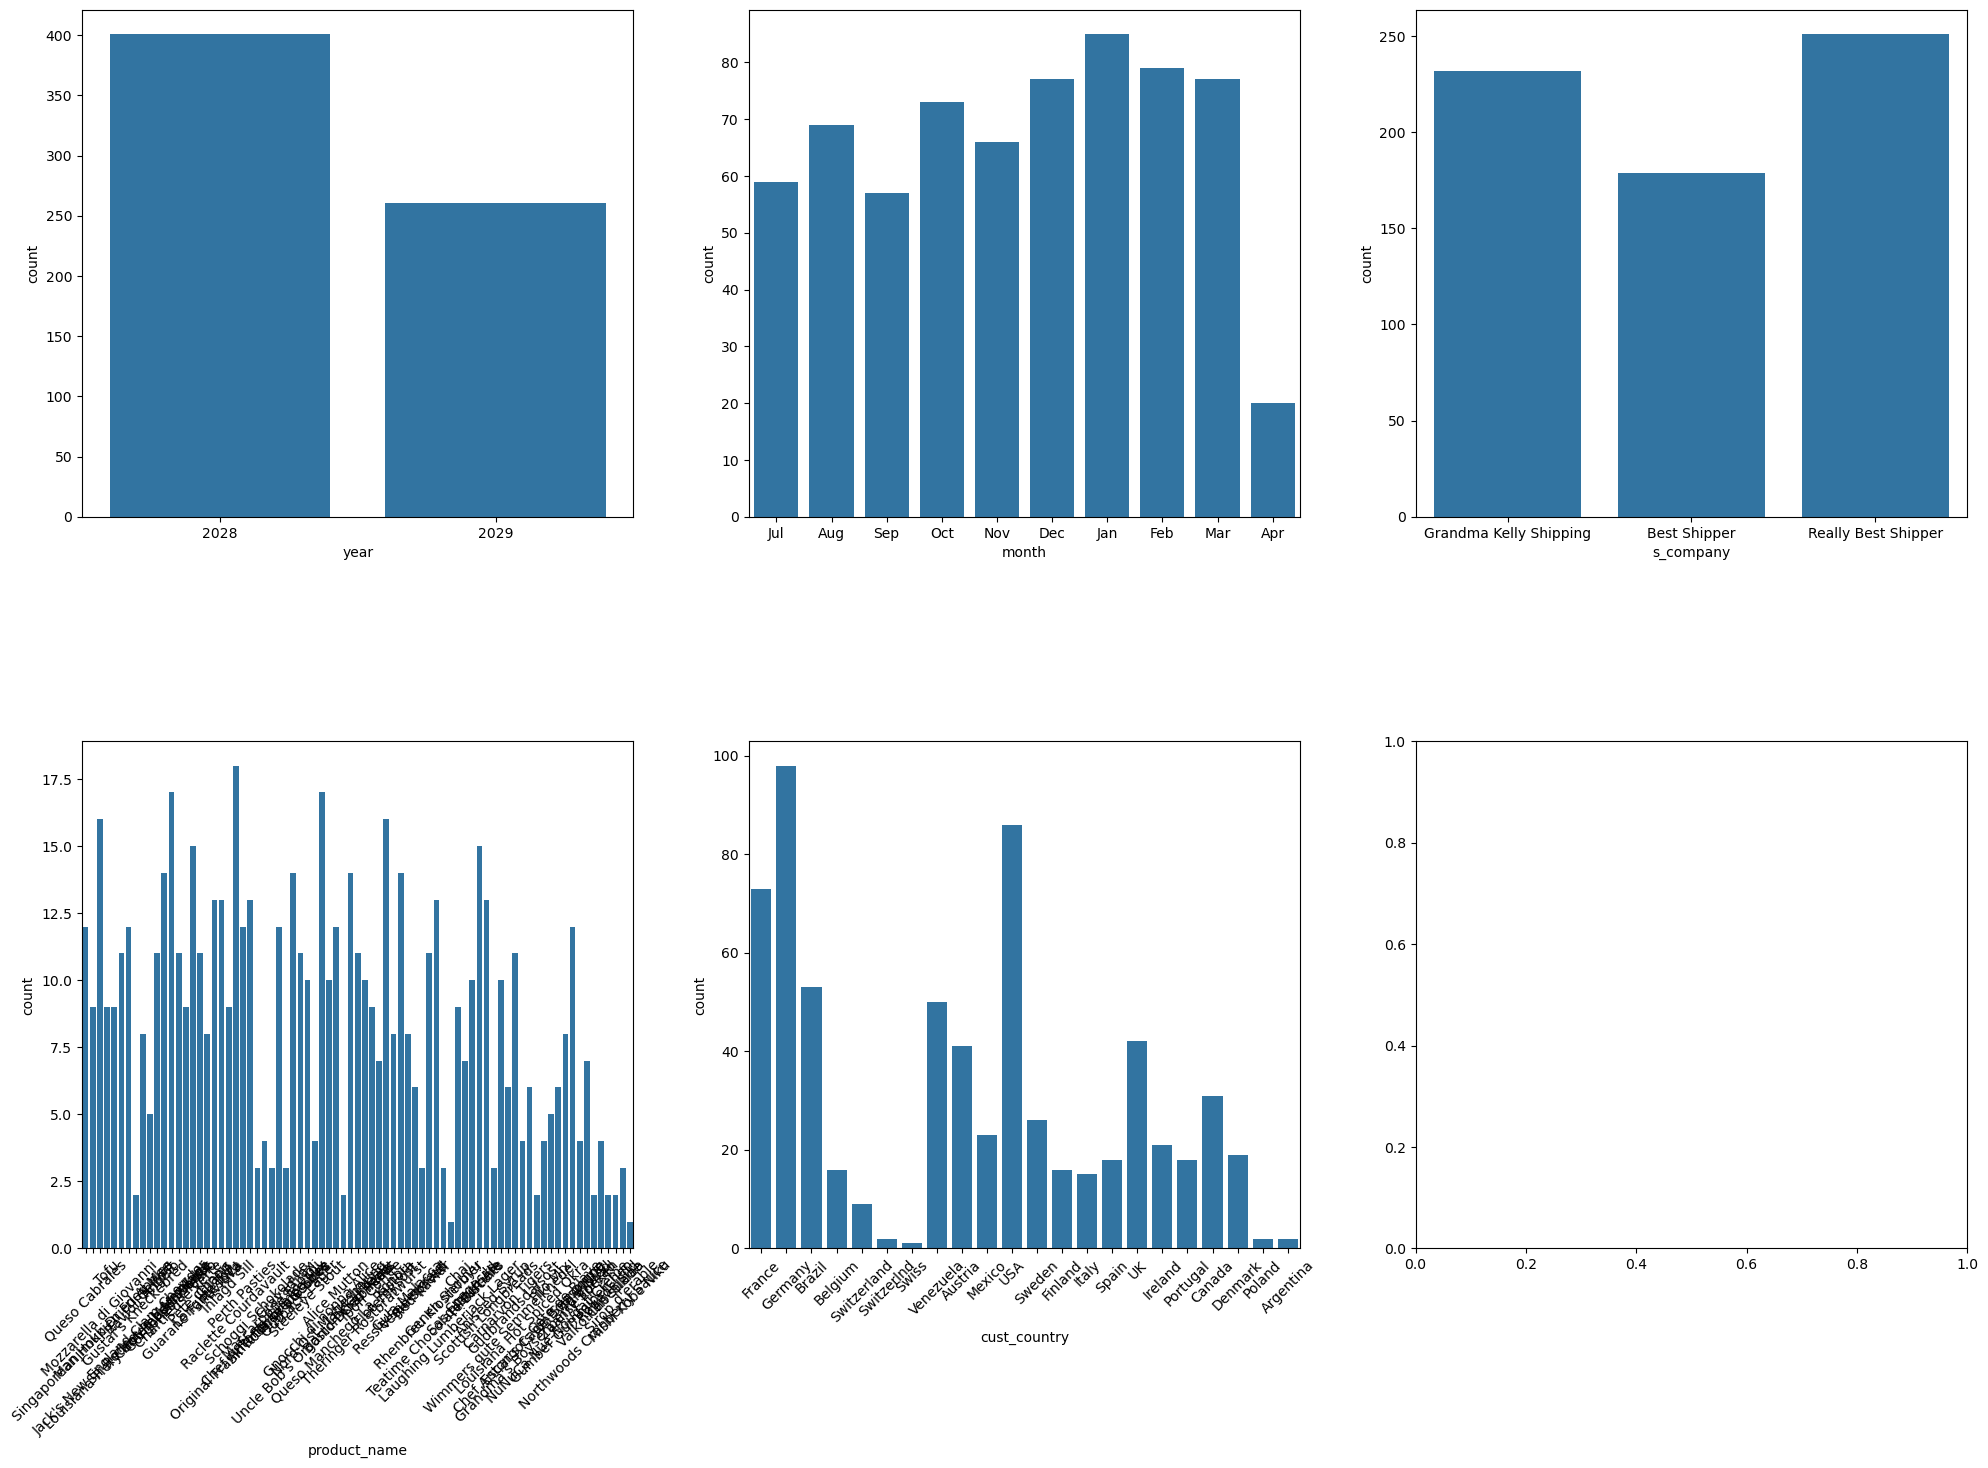

<Figure size 640x480 with 0 Axes>

In [81]:
# Create a bar chart for each categorical variables to see the distribution of the data
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.countplot(x="year", data=df)
plt.subplot(3,3,2)
sns.countplot(x="month", data=df)
plt.subplot(3,3,3)
sns.countplot(x="s_company", data=df)
plt.subplot(3,3,4)
sns.countplot(x="product_name", data=df)
plt.xticks(rotation=45)
plt.subplot(3,3,5)
sns.countplot(x="cust_country", data=df)
plt.xticks(rotation=45)
plt.subplot(3,3,6)
#sns.countplot(x="xyz", data=df)
#plt.subplot(3,3,7)
#sns.countplot(x="xyz", data=df)
#plt.subplot(3,3,8)
#sns.countplot(x="xyz", data=df)
#plt.subplot(3,3,9)
#sns.countplot(x="xyz", data=df)
plt.tight_layout()  # Optional, to avoid overlap
plt.show()


plt.suptitle('Categorical Plotting')
plt.show()

### Examine categorical data a little more closely

In [ ]:
for column in df.columns:         # df.columns is a data frame attribute
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")
    
    
# f means Formatted string literals 

In [ ]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

In [ ]:
df['cust_country'].nunique()

In [ ]:
df['cust_country'].value_counts()

In [ ]:
df.loc[df['cust_country']!= 'Norway']

### Dropping columns and rows

In [ ]:
df.shape

In [ ]:
# Remove a single column
#df = df.drop('xyz',axis=1)  # Axis=1 means drop the column
#df = df.drop('xyz',axis=1)  



In [ ]:
# Remove multiple columns

# glyburide-metformin       
# glipizide-metformin       
# glimepiride-pioglitazone

# drop_columns = {'xyz','xyz'}
# df = df.drop(columns = drop_columns) # inplace=True not used so columns still exist. 
                                     # Just not in this instance.
#df.head()

In [70]:
# Delete by selecting rows not equal to the condition
df = df.loc[df['cust_country']!= 'Norway']
#df = df.loc[df.gender != '?']
#df = df.loc[df['gender']!='?']
df.shape

(662, 15)

#### Quantitative data

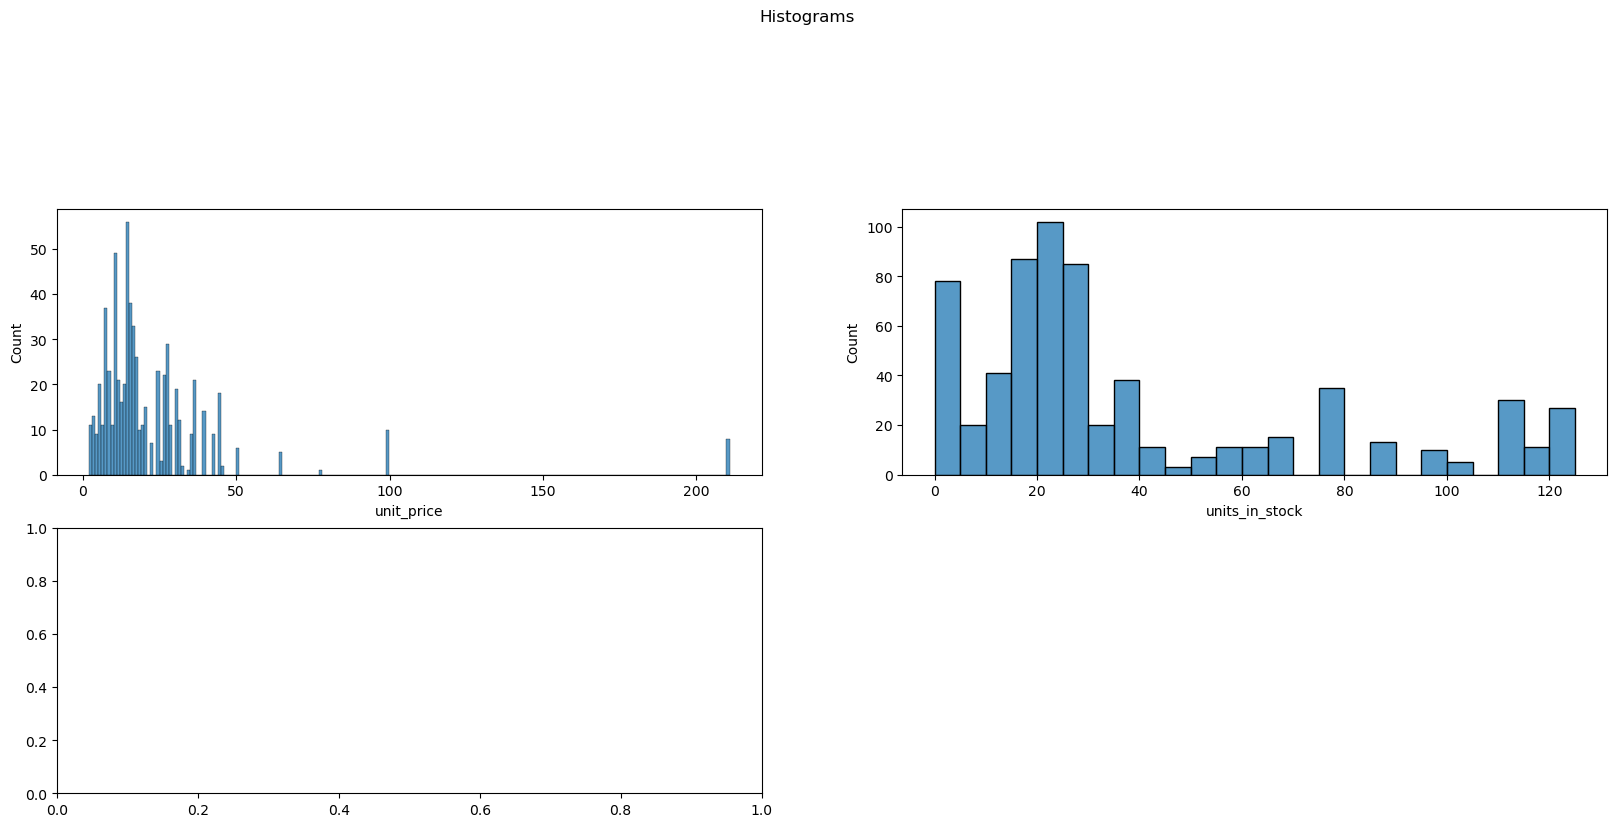

In [71]:
# Histograms

plt.figure(figsize = (20,20))
plt.subplot(521)
sns.histplot(data=df, x='unit_price', binwidth = 1)
plt.subplot(522)
sns.histplot(data=df, x='units_in_stock', bins=25)
plt.subplot(523)


plt.suptitle('Histograms')
plt.show()

In [ ]:
# Pairplot to see the big picture
sns.pairplot(df)

In [ ]:
sns.pairplot(df, hue = 'year', corner = True)

In [ ]:
df['year'].value_counts()

In [ ]:
year_to_plot = '2029'
df_filtered = df[df['year'] == year_to_plot]
sns.pairplot(df_filtered, corner = True)

In [ ]:
# Create a copy of the DataFrame to preserve the original
df_jittered = df.copy()

# Add jitter to numeric columns
for col in df_jittered.select_dtypes(include=[np.number]).columns:
    df_jittered[col] += np.random.normal(0, 0.1, size=df_jittered.shape[0])  # Adjust 0.1 as needed

# Plot the pairplot with jittered data
sns.pairplot(df_jittered, hue='year', corner=True,markers=['s', 'D'])

In [ ]:
#sns.pairplot(df,
#             x_vars=['xyz', 'xyz', 'xyz'],
#             y_vars=['xyz','xyz','xyz','xyz' ])


In [ ]:
# Correlations

df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
df2 = df_numeric.corr()

print(df2)



In [ ]:
plt.figure(figsize=(10,10))
corr = df2.corr()
ax = sns.heatmap(
    df2,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size":10}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

<Axes: >

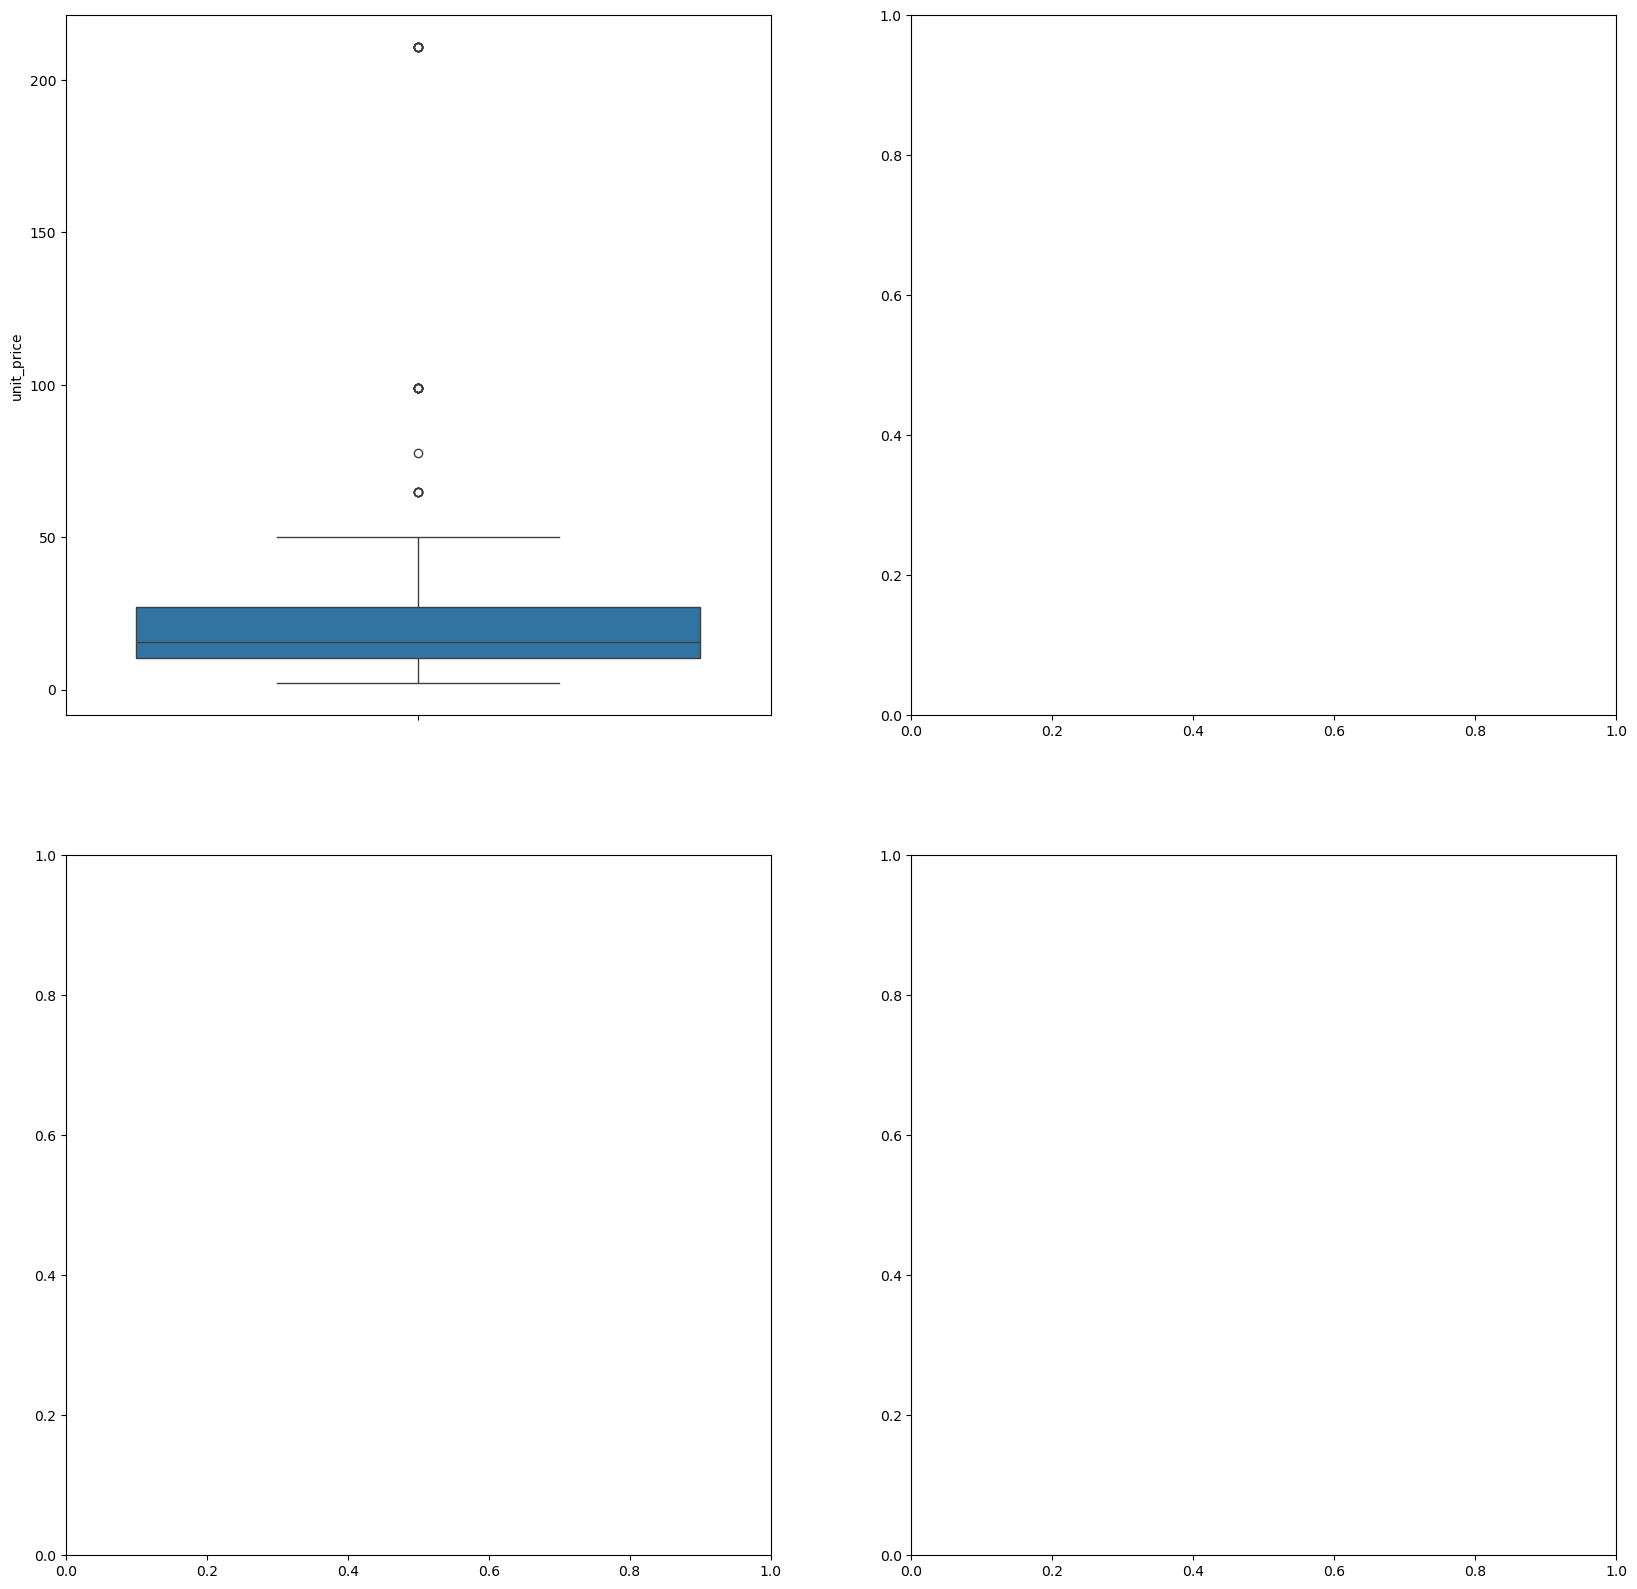

In [75]:
# Focusing on a few variables

plt.figure(figsize = (20,20))
plt.subplot(221)
sns.boxplot(data=df, y="unit_price")
plt.subplot(222)
#sns.boxplot(data=df, y="xyz")
plt.subplot(223)
#sns.boxplot(data=df, y="xyz")
plt.subplot(224)
#sns.boxplot(data=df, y="xyz")

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 662 entries, 0 to 665
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            662 non-null    object 
 1   month           662 non-null    object 
 2   employee_id     662 non-null    int64  
 3   customer_id     647 non-null    object 
 4   cust_country    662 non-null    object 
 5   customer_name   662 non-null    object 
 6   product_id      662 non-null    int64  
 7   product_name    662 non-null    object 
 8   s_company       662 non-null    object 
 9   unit_price      662 non-null    float64
 10  units_in_stock  660 non-null    float64
 11  units_on_order  662 non-null    int64  
 12  discount        484 non-null    float64
 13  quantity        662 non-null    int64  
 14  line_amont      662 non-null    float64
dtypes: float64(4), int64(4), object(7)
memory usage: 82.8+ KB


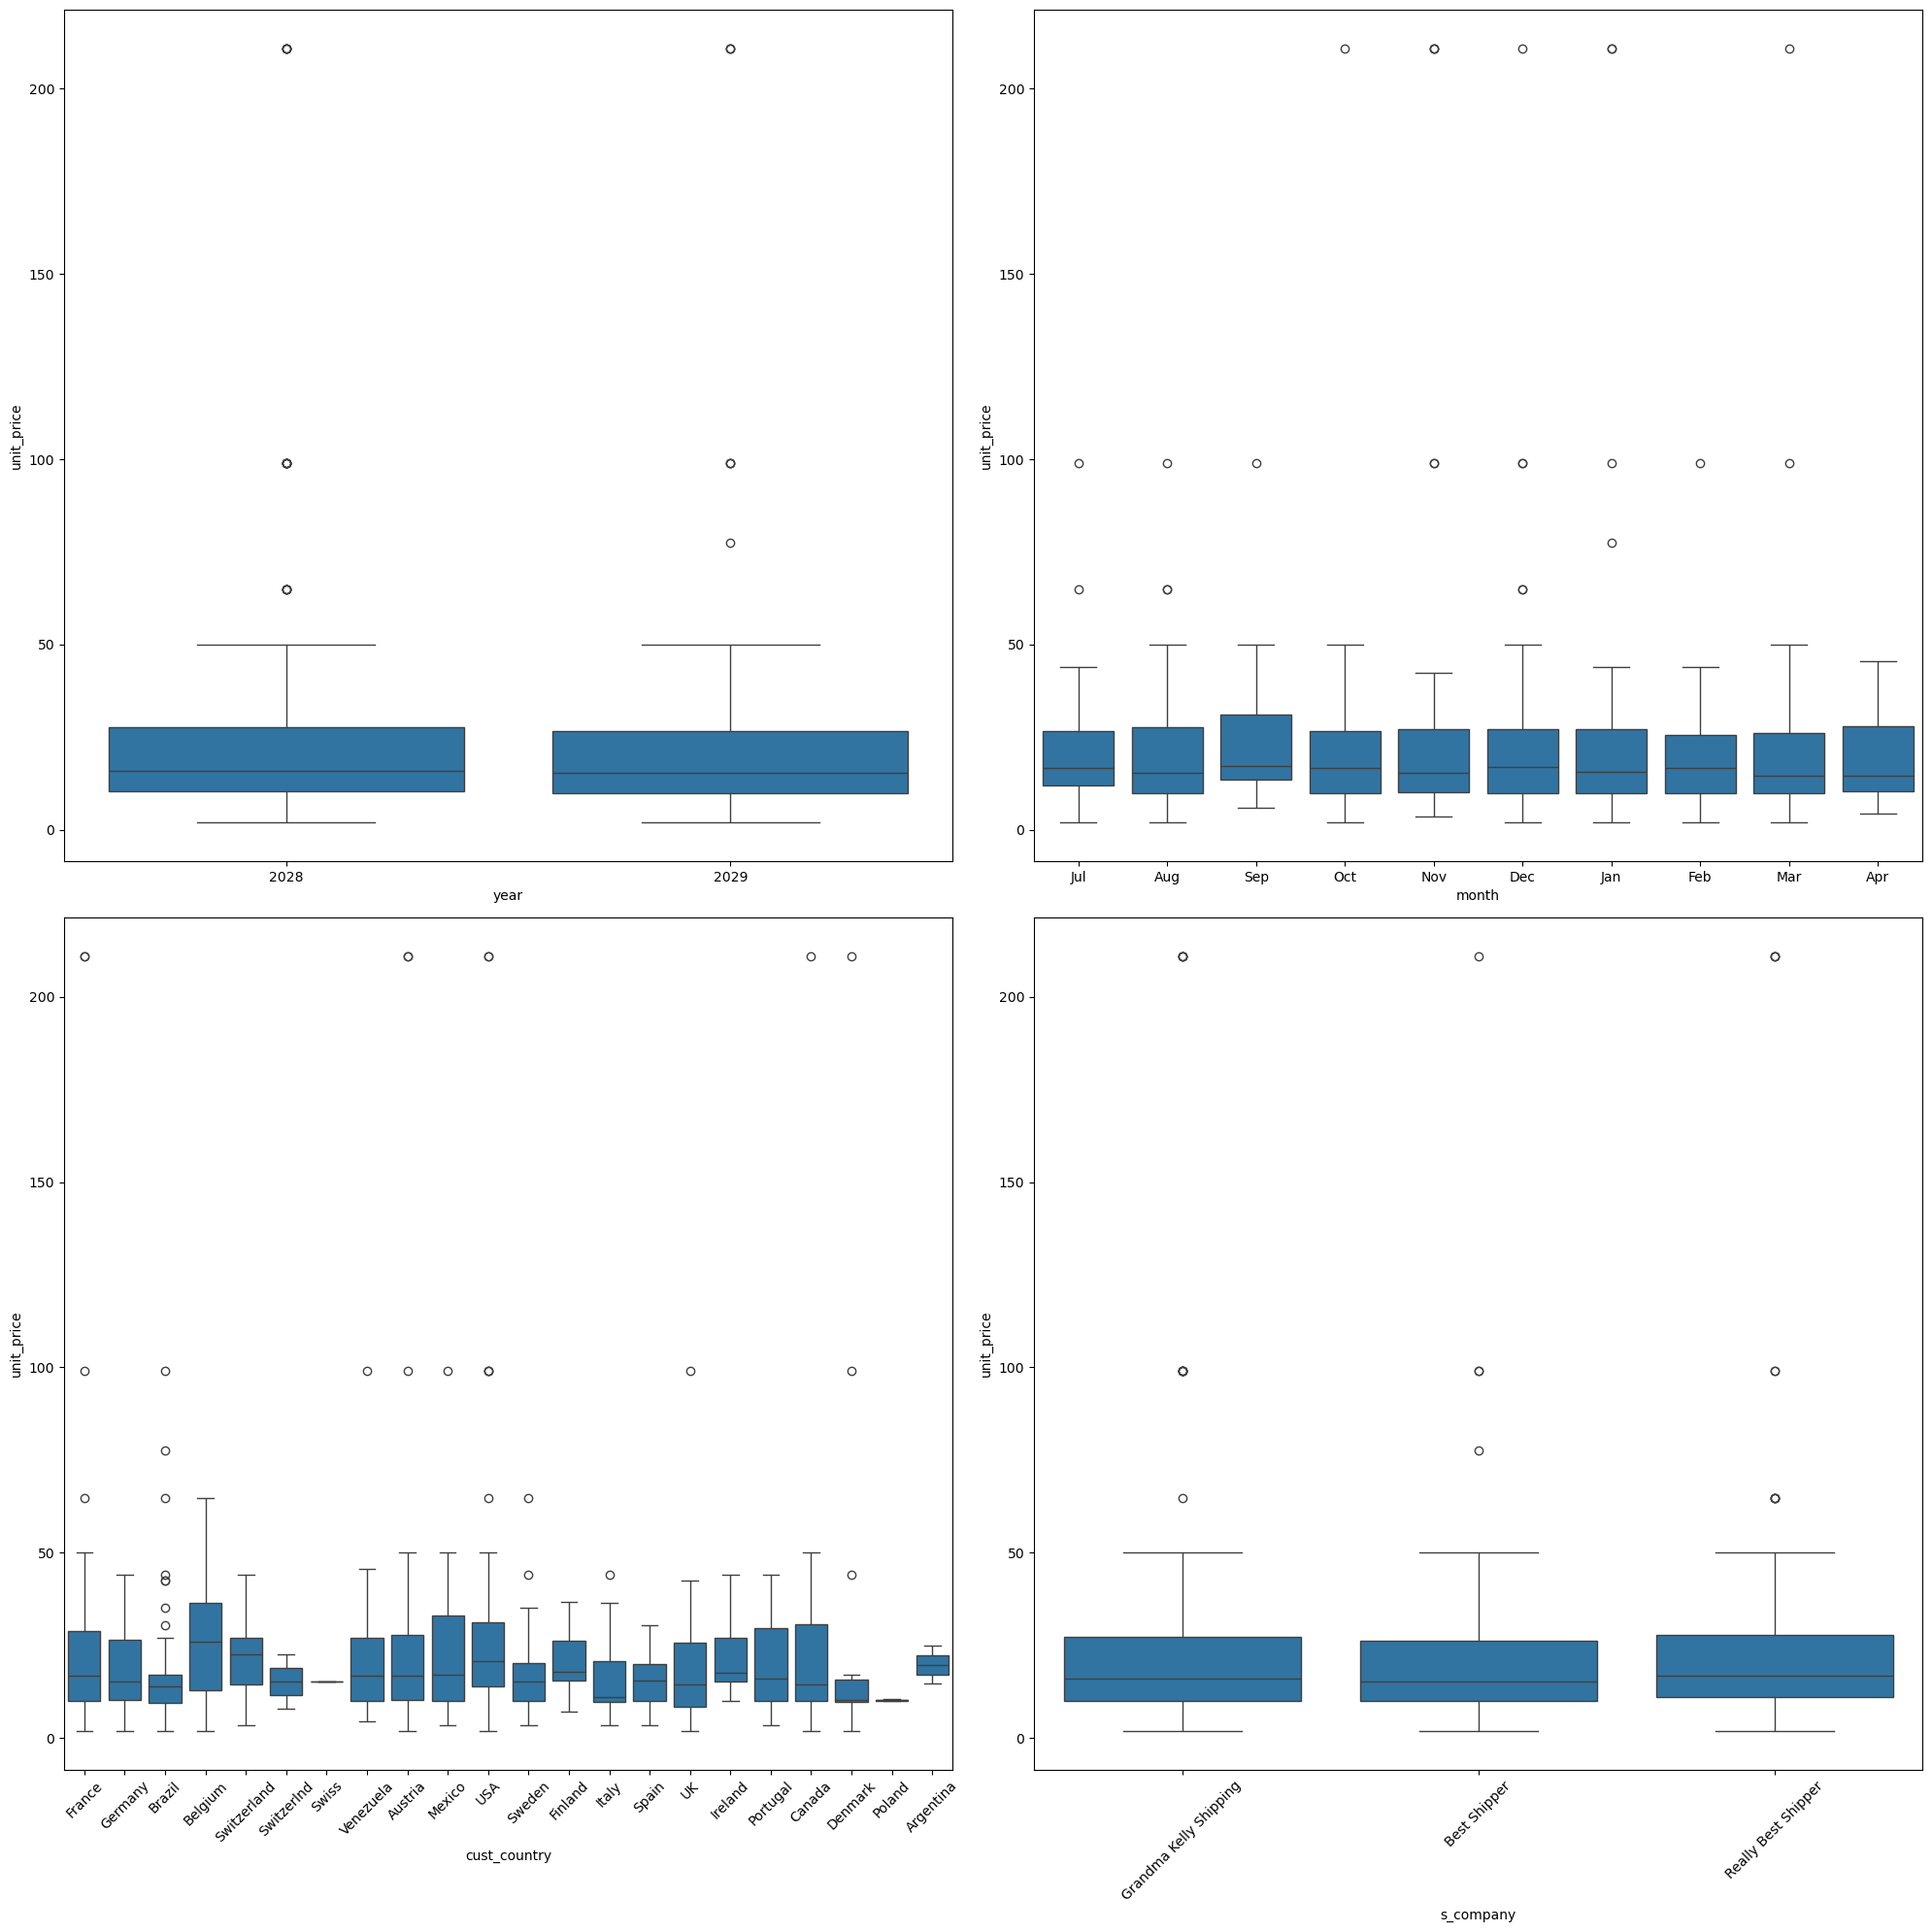

In [79]:
# Focusing on a few variables

plt.figure(figsize = (20,20))
plt.subplot(221)
sns.boxplot(data=df, x='year', y="unit_price")
plt.subplot(222)
sns.boxplot(data=df, x='month', y="unit_price")
plt.subplot(223)
sns.boxplot(data=df, x='cust_country', y="unit_price")
plt.xticks(rotation=45)
plt.subplot(224)
sns.boxplot(data=df, x='s_company', y="unit_price")
plt.xticks(rotation=45)
plt.tight_layout()  # Optional, to avoid overlap
plt.show()

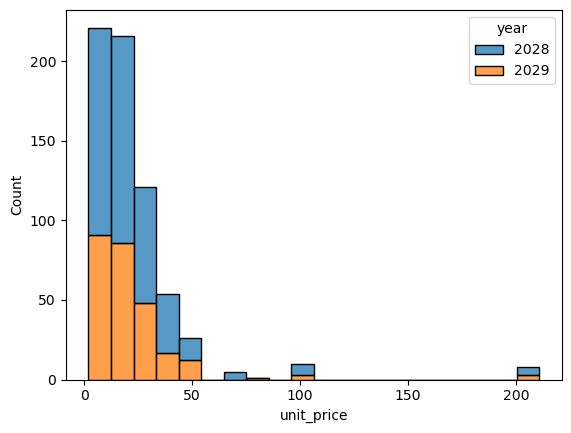

In [93]:
sns.histplot(data=df, x='unit_price', hue='year', multiple = 'stack', bins = 20)
plt.show()

/opt/anaconda3/envs/BasicPython/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/BasicPython/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/BasicPython/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/BasicPython/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/BasicPython/

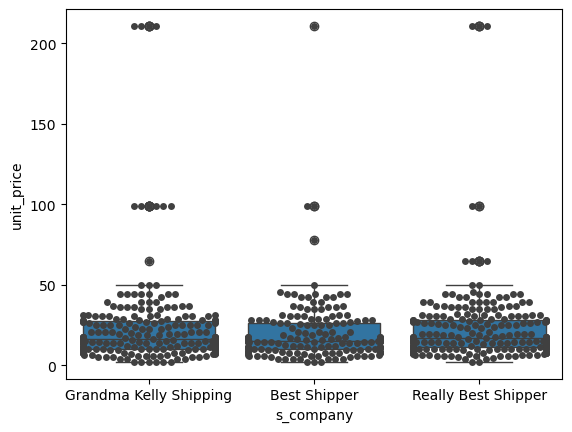

In [94]:
# From Seaborn docuentation
ax = sns.boxplot(x="s_company", y="unit_price", data=df)
ax = sns.swarmplot(x="s_company", y="unit_price", data=df, color=".25")
plt.show()